In [31]:
# Scrape the page.
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup

In [27]:
def run_search(search_term):
    # create Chromeoptions instance 
    options = webdriver.ChromeOptions() 
    
    # adding argument to disable the AutomationControlled flag 
    options.add_argument("--disable-blink-features=AutomationControlled") 
    
    # exclude the collection of enable-automation switches 
    options.add_experimental_option("excludeSwitches", ["enable-automation"]) 
    
    # turn-off userAutomationExtension 
    options.add_experimental_option("useAutomationExtension", False) 
    
    # setting the driver path and requesting a page 
    driver = webdriver.Chrome(options=options) 
    
    # changing the property of the navigator value for webdriver to undefined 
    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})") 
    driver.get(f"https://www.google.com/search?q={search_term}")
    time.sleep(2)  # wait for the page to load
    return driver.page_source


In [53]:
res = run_search("Indian PM")

'<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-IN"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Indian PM - Google Search</title><script type="text/javascript" id="www-widgetapi-script" src="https://www.youtube.com/s/player/20830619/www-widgetapi.vflset/www-widgetapi.js" async="" nonce=""></script><script nonce="">window._hst=Date.now();</script><script nonce="">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){a!=="unload"&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'d63lZ-6OOq2T4-EPh66TwQ8\',kEXPI:\'31\',kBL:\'D9f1\',kOPI:89978449};(function(){var a;((a=window.google)==null?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'web\';google.kHL=\'en-IN\';})();(function(){\nvar g=this||self;function k(){return window.google&&window.google.kOPI||null};var l,m=[];fun
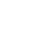
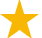
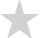
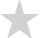
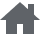
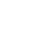
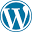
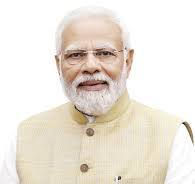
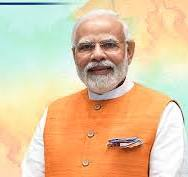
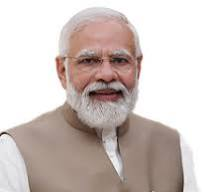
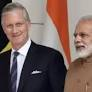
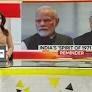
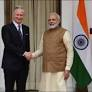
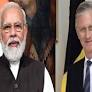
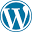
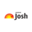
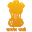
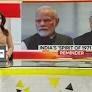
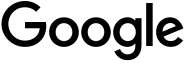

In [54]:
res

In [55]:

soup = BeautifulSoup(res, "html.parser")

links = []
for a in soup.find_all("a", href=True):
    link = a["href"]
    text = a.get_text(strip=True)
    links.append({"url": link, "text": text})


In [56]:
links

[{'url': '/httpservice/retry/enablejs?sei=d63lZ-6OOq2T4-EPh66TwQ8',
  'text': 'here'},
 {'url': 'https://support.google.com/websearch/answer/181196?hl=en-IN',
  'text': 'Accessibility help'},
 {'url': 'https://www.google.com/webhp?hl=en&sa=X&ved=0ahUKEwiupq7RhauMAxWtyTgGHQfXJPgQPAgI',
  'text': ''},
 {'url': 'https://www.google.com/webhp?hl=en&ictx=0&sa=X&ved=0ahUKEwiupq7RhauMAxWtyTgGHQfXJPgQpYkNCAo',
  'text': ''},
 {'url': 'https://www.google.co.in/intl/en/about/products?tab=wh', 'text': ''},
 {'url': 'https://accounts.google.com/ServiceLogin?hl=en&passive=true&continue=https://www.google.com/search%3Fq%3DIndian%2520PM%26sei%3Dd63lZ-jOI8GI4-EPhryZyAM&ec=GAZAAQ',
  'text': 'Sign in'},
 {'url': '/search?sca_esv=e1bc306dcb0911c4&q=Indian+PM&udm=2&fbs=ABzOT_CWdhQLP1FcmU5B0fn3xuWpA-dk4wpBWOGsoR7DG5zJBnsX62dbVmWR6QCQ5QEtPRqut5gkyra9fZFbsKm1oGezZfNjBY6JC6SkJAVAOI0b5OFsBGc76aDMxtuacnLS7X32-5RBJi3DslBBuGrMim5dcyCpAyZTg_k-q35rsDodRcqN2TK5Sr6hG-8s-j-XIJlt7hyRrkkX4JvUEf1PhS4UabKMjw&sa=X&ved=2ahU

In [ ]:
url = [
    "https://www.youtube.com/watch?v=9k3Ky2nn6MY",
    "https://www.youtube.com/watch?v=-AuK92Jq4yQ",
    "https://www.youtube.com/watch?v=WM1XcYXix0Y",
    "https://www.reddit.com/r/Cooking/comments/lm5vlt/what_are_the_secrets_to_making_delicious_homemade/",
    "https://www.reddit.com/r/Cooking/comments/lm5vlt/what_are_the_secrets_to_making_delicious_homemade/gntez09/",
    "https://www.reddit.com/r/Cooking/comments/lm5vlt/what_are_the_secrets_to_making_delicious_homemade/gnte1zy/",
    "https://www.simplyrecipes.com/recipes/homemade_pizza/",
    "https://www.indianhealthyrecipes.com/pizza-recipe-make-pizza/",
    "https://www.tasty.co/recipe/pizza-dough",
    "https://www.instructables.com/How-to-Make-The-Best-Homemade-Pizza/",
    "https://www.bbcgoodfood.com/recipes/pizza-margherita-4-easy-steps",
    "https://www.quora.com/How-do-I-make-pizza-at-home-like-Zomato",
    "https://www.quora.com/How-do-I-make-a-homemade-pizza-What-is-the-process-ingredients-and-specifics-such-as-temperature",
    "https://www.loveandlemons.com/homemade-pizza/",
    "https://www.sallysbakingaddiction.com/homemade-pizza-crust-recipe/",
    "https://www.patioandpizza.com/blogs/pizza-life/ingredients-in-pizza"
]


In [57]:
import yt_dlp
from concurrent.futures import ThreadPoolExecutor

def get_video_metadata(video_url):
    ydl_opts = {
        'quiet': True,  # Suppress output
        'force_generic_extractor': True,
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info_dict = ydl.extract_info(video_url, download=False)
        metadata = {
            'title': info_dict.get('title', None),
            'description': info_dict.get('description', None),
            'published_at': info_dict.get('upload_date', None),
            'view_count': info_dict.get('view_count', None),
            'like_count': info_dict.get('like_count', 'N/A'),
            'duration': info_dict.get('duration', None),
            'url': info_dict.get('url', None),
        }
        return metadata

def fetch_multiple_metadata(urls):
    # Using ThreadPoolExecutor to fetch metadata in parallel
    with ThreadPoolExecutor(max_workers=5) as executor:
        results = executor.map(get_video_metadata, urls)
    return list(results)

# Example usage with multiple YouTube video URLs
video_urls = [
    "https://www.youtube.com/watch?v=9zaZqpvlrJE"
]

metadata_list = fetch_multiple_metadata(video_urls)

# Print the metadata for all URLs
for metadata in metadata_list:
    if metadata:
        print("Video Metadata:")
        for key, value in metadata.items():
            print(f"{key}: {value}")
        print("-" * 9390)


Video Metadata:
title: Indian PM Narendra Modi Wins Third Historic Term But With Reduced Majority | Firstpost Africa
description: Indian PM Narendra Modi Wins Third Historic Term But With Reduced Majority | Firstpost Africa

India concluded its six-week-long election where over 600 million voters cast their ballots. India’s ruling Bharatiya Janata Party along with their allies form the National Democratic Alliance. The NDA has now secured a third consecutive term and will form the Central government. At the same time, the Opposition INDI Alliance has secured more seats than they had in the 2019 polls giving the NDA a tight political contest. Among this, the Telugu Desam Party and the Janata United Dal have emerged as kingmakers as Chandrababu Naidu and Nitish Kumar aim for key roles in the ruling coalition. Meanwhile, the Samajwadi Party has won big in Uttar Pradesh as Akhilesh Yadav rallies his supporters in coalition with the Congress Party. In Maharashtra, Uddhav Thackeray and Shara

In [59]:
import concurrent.futures
import threading
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# Create a thread-local driver pool to reuse drivers per thread.
driver_pool = {}

def get_driver():
    thread_id = threading.get_ident()
    if thread_id not in driver_pool:
        chrome_options = Options()
        chrome_options.add_argument("--headless")
        chrome_options.add_argument("--disable-gpu")
        chrome_options.add_argument("--disable-extensions")
        chrome_options.add_argument("--disable-popup-blocking")
        # Disable images to speed up loading
        prefs = {"profile.managed_default_content_settings.images": 2}
        chrome_options.add_experimental_option("prefs", prefs)
        # Other useful options can be added here.
        driver_pool[thread_id] = webdriver.Chrome(options=chrome_options)
    return driver_pool[thread_id]

def extract_page_info(url):
    driver = get_driver()
    try:
        driver.get(url)
        # Attempt to auto-click common cookie/consent buttons
        try:
            driver.execute_script(
                "document.querySelectorAll('[aria-label=\"Accept cookies\"],"
                "button.cookie-accept, button#accept-cookies').forEach(el => el.click());"
            )
        except Exception:
            pass  # Ignore if not found
        title = driver.title
        # Grab first 200 characters of page source for a snippet
        page_snippet = driver.page_source[:200]
    except Exception as e:
        title = f"Error: {e}"
        page_snippet = ""
    return {"url": url, "title": title, "snippet": page_snippet}

def main():
    # Suppose 'url' is a list of URLs defined elsewhere; filter out YouTube watch URLs.
    urls = [i for i in url if "https://www.youtube.com/watch?v=" not in i]
    with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
        future_to_url = {executor.submit(extract_page_info, url): url for url in urls}
        for future in concurrent.futures.as_completed(future_to_url):
            result = future.result()
            print(f"URL: {result['url']}")
            print(f"Title: {result['title']}")
            print(f"Snippet: {result['snippet']}")
            print("-" * 80)
    # Quit all drivers once done
    for drv in driver_pool.values():
        drv.quit()

if __name__ == "__main__":
    main()


URL: https://www.simplyrecipes.com/recipes/homemade_pizza/
Title: Homemade Pizza & Pizza Dough Recipe
Snippet: <html id="recipeScTemplate_1-0" class="comp recipeScTemplate article-html html mntl-html simplyrecipes no-touchevents is-window-loaded" data-mm-ads-resource-version="2.1.29" data-mm-video-resource-ver
--------------------------------------------------------------------------------
URL: https://www.reddit.com/r/Cooking/comments/lm5vlt/what_are_the_secrets_to_making_delicious_homemade/
Title: 
Snippet: <html><head></head><body class="theme-beta"><div><style>.theme-light,:root{--rem360:22.5rem;--rem320:20rem;--rem192:12rem;--rem144:9rem;--rem128:8rem;--rem96:6rem;--rem90:5.625rem;--rem88:5.5rem;--rem
--------------------------------------------------------------------------------
URL: https://www.reddit.com/r/Cooking/comments/lm5vlt/what_are_the_secrets_to_making_delicious_homemade/gnte1zy/
Title: 
Snippet: <html><head></head><body class="theme-beta"><div><style>.theme-light,:roo

KeyboardInterrupt: 